Trump Tweet Dataset

In [104]:
import pandas as pd
df = pd.read_csv("C:/Users/seonahryu/Desktop/urp/combined_output.csv")

In [8]:
df.head(5)

,status_id,author_name,user_id,post_time,post_content
0,7136,MSG_Jack_Dona_RET,@MSG_Jack_Dona_RET,2023-12-26 13:44:00,"All, please take 4 minutes to watch this video..."
1,7228,Donald J. Trump,@realDonaldTrump,2023-12-26 14:11:00,Wow—Thank you Charlie!
2,7225,Donald J. Trump,@realDonaldTrump,2023-12-26 14:12:00,Thanks Derrick!
3,7216,Donald J. Trump,@realDonaldTrump,2023-12-26 14:15:00,Garrett Ventry: “The Colorado Supreme Court ta...
4,7214,Donald J. Trump,@realDonaldTrump,2023-12-26 14:16:00,“Trump’s MAGA force swamps the competition in ...


나스닥 지수 데이터셋

In [9]:
import pandas as pd

df_nasdaq = pd.read_csv("C:/Users/seonahryu/Desktop/urp/nasdaq_data_2023_2024.csv")

# 'Unnamed: 0' 열을 날짜로 변환
df_nasdaq['date'] = pd.to_datetime(df_nasdaq['Unnamed: 0'])

# 'Unnamed: 0' 열 제거
df_nasdaq.drop(columns=['Unnamed: 0'], inplace=True)

df_nasdaq.set_index('date', inplace=True)

In [66]:
df_nasdaq

,Open,High,Low,Close,Volume,Adj Close
date,,,,,,
2023-12-26,15028.690430,15101.179688,15024.059570,15074.570312,6120600000,15074.570312
2023-12-27,15089.660156,15114.080078,15051.669922,15099.179688,7480170000,15099.179688
2023-12-28,15142.089844,15150.070312,15087.219727,15095.139648,5090570000,15095.139648
2023-12-29,15099.200195,15111.410156,14955.370117,15011.349609,5441060000,15011.349609
2024-01-02,14873.700195,14887.799805,14682.379883,14765.940430,5791170000,14765.940430
...,...,...,...,...,...,...
2024-12-18,20114.980469,20179.769531,19336.589844,19392.689453,9996120000,19392.689453
2024-12-19,19565.660156,19623.019531,19357.759766,19372.769531,8029590000,19372.769531
2024-12-20,19190.039062,19758.609375,19168.380859,19572.599609,10962450000,19572.599609


Text(0, 0.5, 'close price')

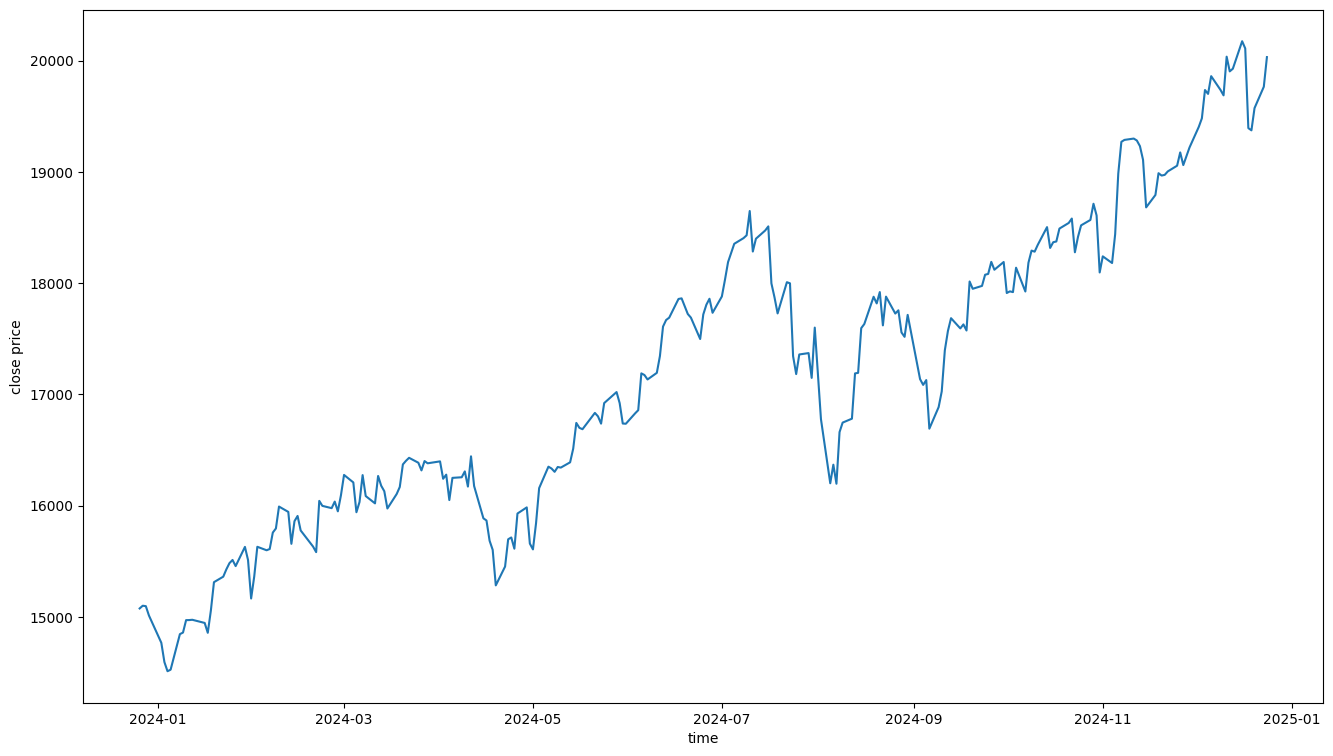

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16,9))
sns.lineplot(y=df_nasdaq['Close'], x=df_nasdaq.index)
plt.xlabel('time')
plt.ylabel('close price')

### 감성분석

VADER 감성분석

In [11]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\seonahryu\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [12]:
def sentiment_analysis(text):
    score = sia.polarity_scores(text)
    return score['compound']

In [112]:
df['vader_sentiment_score'] = df['post_content'].apply(sentiment_analysis)
print(df[['post_content', 'vader_sentiment_score']].head(10))

                                        post_content  vader_sentiment_score
0  All, please take 4 minutes to watch this video...                -0.1511
1                             Wow—Thank you Charlie!                 0.0000
2                                    Thanks Derrick!                 0.4926
3  Garrett Ventry: “The Colorado Supreme Court ta...                 0.5994
4  “Trump’s MAGA force swamps the competition in ...                 0.0000
5  “Yielding to Temptation: Colorado’s Supreme Co...                 0.4019
6               “A New York Times Columnist Has TDS”                 0.0000
7  “Why, in the Coming Election, the 2020 Result ...                 0.0000
8  “Trump claims ‘atrocities we are witnessing in...                 0.0000
9  “Trump Vows U.S. Tariffs on All Foreign Import...                 0.3818


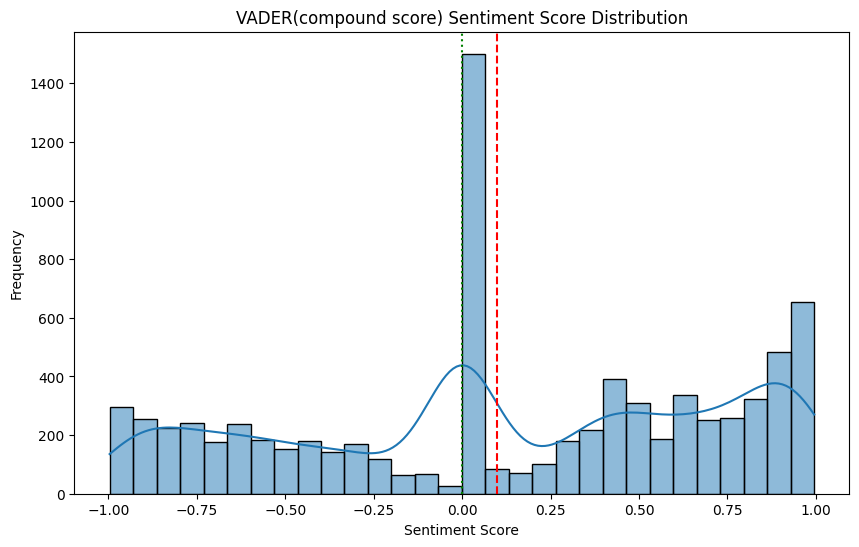

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(df['vader_sentiment_score'], bins=30, kde=True)
plt.title('VADER(compound score) Sentiment Score Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.axvline(x=0.1, color='red', linestyle='--')  # 0.1 점수를 기준으로 긍정과 부정을 나누기 위해 선 추가
plt.axvline(x=0, color='green', linestyle='dotted') # 0 == 중립
plt.show()

In [113]:
threshold = 0.1 ### hyper-parameter!!!!

# 감정 카테고리 정의
df['final_vader_sentiment'] = 0  # 기본값을 0으로 설정
df.loc[df['vader_sentiment_score'] > threshold, 'final_vader_sentiment'] = 1  # 긍정
df.loc[df['vader_sentiment_score'] < -threshold, 'final_vader_sentiment'] = -1  # 부정

total : 7884개
positive : 3825개
negative : 2480개
neutral : 1579개
positive : 48.51598173515982%
negative : 31.45611364789447%
neutral : 20.027904616945712%


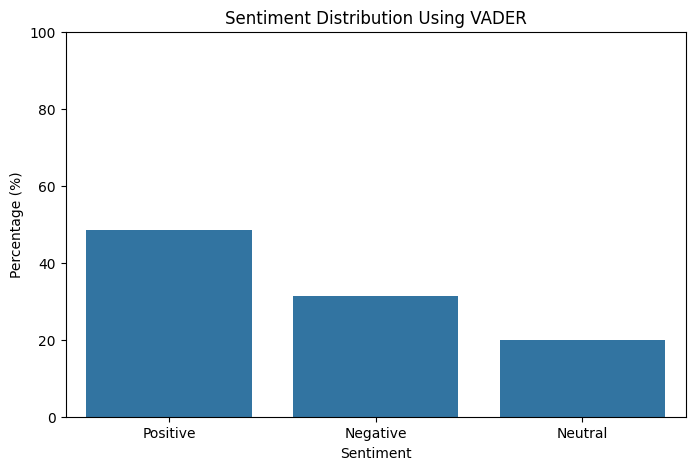

In [16]:
# 긍정과 부정 비율 계산
positive_count = (df['final_vader_sentiment'] == 1).sum()
negative_count = (df['final_vader_sentiment'] == -1).sum()
neutral_count = (df['final_vader_sentiment'] == 0).sum()

total_count = positive_count + negative_count + neutral_count

print(f'total : {total_count}개')
print(f'positive : {positive_count}개')
print(f'negative : {negative_count}개')
print(f'neutral : {neutral_count}개')

positive_percentage = (positive_count / total_count) * 100
negative_percentage = (negative_count / total_count) * 100
neutral_percentage = (neutral_count / total_count) * 100

print(f'positive : {positive_percentage}%')
print(f'negative : {negative_percentage}%')
print(f'neutral : {neutral_percentage}%')

# 비율 데이터프레임 생성
sentiment_distribution = pd.DataFrame({
    'Sentiment': ['Positive', 'Negative', 'Neutral'],
    'Percentage': [positive_percentage, negative_percentage, neutral_percentage]
})

# 비율 시각화
plt.figure(figsize=(8, 5))
sns.barplot(x='Sentiment', y='Percentage', data=sentiment_distribution)
plt.title('Sentiment Distribution Using VADER')
plt.xlabel('Sentiment')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)
plt.show()

RoBERTa

In [114]:
from transformers import RobertaTokenizer, RobertaForSequenceClassification
import torch

# RoBERTa 모델 및 토크나이저 로드
model_name = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = RobertaTokenizer.from_pretrained(model_name)
model = RobertaForSequenceClassification.from_pretrained(model_name)

# 평가 모드로 전환
model.eval()

# 감성 분석 함수 정의
def classify_sentiment(text):
    encoded_input = tokenizer(text, truncation=True, padding=True, max_length=128, return_tensors="pt")
    with torch.no_grad():
        output = model(**encoded_input)
        scores = torch.nn.functional.softmax(output.logits, dim=-1)[0].tolist()
        sentiment_mapping = {0: -1, 1: 0, 2: 1}  # negative: -1, neutral: 0, positive: 1
        sentiment_index = scores.index(max(scores))
        sentiment = sentiment_mapping[sentiment_index]
        return sentiment, {
            -1: scores[0],  # negative
            0: scores[1],   # neutral
            1: scores[2]    # positive
        }


df["roberta_sentiment"] = None

for i, row in df.iterrows():
    sentiment, scores = classify_sentiment(row["post_content"])
    df.at[i, "roberta_sentiment"] = sentiment
    if i % 100 == 0:  # 100개마다 진행 상황 출력
        print(f"Processed {i} out of {len(df)} rows")

# 결과 출력
print(df["post_content"].head())


Processed 0 out of 7884 rows
Processed 100 out of 7884 rows
Processed 200 out of 7884 rows
Processed 300 out of 7884 rows
Processed 400 out of 7884 rows
Processed 500 out of 7884 rows
Processed 600 out of 7884 rows
Processed 700 out of 7884 rows
Processed 800 out of 7884 rows
Processed 900 out of 7884 rows
Processed 1000 out of 7884 rows
Processed 1100 out of 7884 rows
Processed 1200 out of 7884 rows
Processed 1300 out of 7884 rows
Processed 1400 out of 7884 rows
Processed 1500 out of 7884 rows
Processed 1600 out of 7884 rows
Processed 1700 out of 7884 rows
Processed 1800 out of 7884 rows
Processed 1900 out of 7884 rows
Processed 2000 out of 7884 rows
Processed 2100 out of 7884 rows
Processed 2200 out of 7884 rows
Processed 2300 out of 7884 rows
Processed 2400 out of 7884 rows
Processed 2500 out of 7884 rows
Processed 2600 out of 7884 rows
Processed 2700 out of 7884 rows
Processed 2800 out of 7884 rows
Processed 2900 out of 7884 rows
Processed 3000 out of 7884 rows
Processed 3100 out o

In [32]:
# 긍정과 부정 비율 계산
positive_count = (df['roberta_sentiment'] == 1).sum()
negative_count = (df['roberta_sentiment'] == -1).sum()
neutral_count = (df['roberta_sentiment'] == 0).sum()

total_count = positive_count + negative_count + neutral_count

print(f'total : {total_count}개')
print(f'positive : {positive_count}개')
print(f'negative : {negative_count}개')
print(f'neutral : {neutral_count}개')

positive_percentage = (positive_count / total_count) * 100
negative_percentage = (negative_count / total_count) * 100
neutral_percentage = (neutral_count / total_count) * 100

print(f'positive : {positive_percentage}%')
print(f'negative : {negative_percentage}%')
print(f'neutral : {neutral_percentage}%')

total : 7884개
positive : 2676개
negative : 2967개
neutral : 2241개
positive : 33.94216133942161%
negative : 37.63318112633181%
neutral : 28.424657534246577%


In [72]:
df

,status_id,author_name,user_id,post_content,vader_sentiment,roberta_sentiment,total_sentiment
date,,,,,,,
2023-12-26,7136,MSG_Jack_Dona_RET,@MSG_Jack_Dona_RET,"All, please take 4 minutes to watch this video...",-1,-1,-1.0
2023-12-26,7228,Donald J. Trump,@realDonaldTrump,Wow—Thank you Charlie!,0,1,0.5
2023-12-26,7225,Donald J. Trump,@realDonaldTrump,Thanks Derrick!,1,1,1.0
2023-12-26,7216,Donald J. Trump,@realDonaldTrump,Garrett Ventry: “The Colorado Supreme Court ta...,1,-1,0.0
2023-12-26,7214,Donald J. Trump,@realDonaldTrump,“Trump’s MAGA force swamps the competition in ...,0,-1,-0.5
...,...,...,...,...,...,...,...
2024-12-25,28795,Donald J. Trump,@realDonaldTrump,"Merry Christmas to all, including to the wonde...",1,0,0.5
2024-12-25,28796,Donald J. Trump,@realDonaldTrump,…Page 2: Merry Christmas to the Radical Left L...,1,-1,0.0
2024-12-25,28797,Donald J. Trump,@realDonaldTrump,"I just left Wayne Gretzky, “The Great One” as ...",1,1,1.0


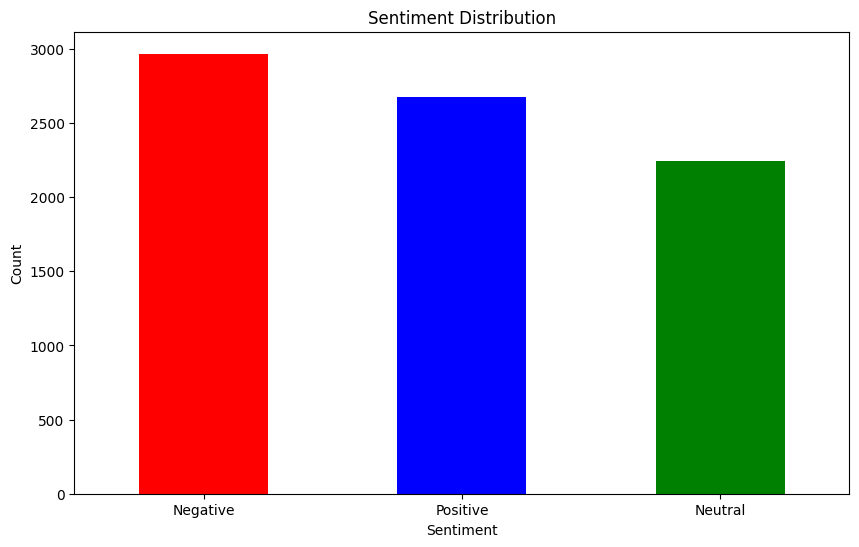

In [26]:
import matplotlib.pyplot as plt

# Sentiment distribution
sentiment_counts = df["roberta_sentiment"].value_counts()

sentiment_labels = {-1: 'Negative', 0: 'Neutral', 1: 'Positive'}

# 레이블로 변환
sentiment_counts.index = sentiment_counts.index.map(sentiment_labels)

# Plotting the sentiment distribution
plt.figure(figsize=(10, 6))
sentiment_counts.plot(kind='bar', color=['red', 'blue', 'green'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

total sentiment 열 생성 (vader_sentiment + roberta_sentiment)

In [115]:
# total_sentiment 열 계산
df['total_sentiment'] = df.apply(
    lambda row: row['roberta_sentiment'] if row['roberta_sentiment'] == row['final_vader_sentiment'] #vader 결과와 roberta 결과 같으면
    else (row['roberta_sentiment'] + row['final_vader_sentiment']) / 2, #다른 경우 평균 값
    axis=1)
# 일단, 두 열의 값이 같다면 그 값으로 긍/부/중립 가져가고
# 감성분석 결과가 다를 경우, 평균 값으로 가짐 -> -1, -0.5, 0, -0.5, 1 값을 갖게 됨

In [116]:
print(df.head(10))

   status_id        author_name             user_id            post_time  \
0       7136  MSG_Jack_Dona_RET  @MSG_Jack_Dona_RET  2023-12-26 13:44:00   
1       7228    Donald J. Trump    @realDonaldTrump  2023-12-26 14:11:00   
2       7225    Donald J. Trump    @realDonaldTrump  2023-12-26 14:12:00   
3       7216    Donald J. Trump    @realDonaldTrump  2023-12-26 14:15:00   
4       7214    Donald J. Trump    @realDonaldTrump  2023-12-26 14:16:00   
5       7207    Donald J. Trump    @realDonaldTrump  2023-12-26 14:24:00   
6       7205    Donald J. Trump    @realDonaldTrump  2023-12-26 14:27:00   
7       7185    Donald J. Trump    @realDonaldTrump  2023-12-26 14:34:00   
8       7184    Donald J. Trump    @realDonaldTrump  2023-12-26 14:37:00   
9       7183    Donald J. Trump    @realDonaldTrump  2023-12-26 14:38:00   

                                        post_content  vader_sentiment_score  \
0  All, please take 4 minutes to watch this video...                -0.1511   
1    

In [117]:
# vader_sentiment_score 열 삭제
# final_vader_sentiment 열만 사용할 것이기 때문문
df.drop(columns=['vader_sentiment_score'], inplace=True)

# final_vader_sentiment 열 이름 변경
df.rename(columns={'final_vader_sentiment': 'vader_sentiment'}, inplace=True)

# 결과 출력
print(df.head())

   status_id        author_name             user_id            post_time  \
0       7136  MSG_Jack_Dona_RET  @MSG_Jack_Dona_RET  2023-12-26 13:44:00   
1       7228    Donald J. Trump    @realDonaldTrump  2023-12-26 14:11:00   
2       7225    Donald J. Trump    @realDonaldTrump  2023-12-26 14:12:00   
3       7216    Donald J. Trump    @realDonaldTrump  2023-12-26 14:15:00   
4       7214    Donald J. Trump    @realDonaldTrump  2023-12-26 14:16:00   

                                        post_content  vader_sentiment  \
0  All, please take 4 minutes to watch this video...               -1   
1                             Wow—Thank you Charlie!                0   
2                                    Thanks Derrick!                1   
3  Garrett Ventry: “The Colorado Supreme Court ta...                1   
4  “Trump’s MAGA force swamps the competition in ...                0   

  roberta_sentiment  total_sentiment  
0                -1             -1.0  
1                 1       

df(trump tweet + sentiment analysis) 와 df_nasdaq 데이터 join
- tweet 게시일 (post_content)을 기준으로

In [118]:
# trump tweet에서 post_time 년-월-일이 일치하는 경우, 해당 일자 nasdaq 지수와 outer join
# 이를 위해 df에서 post_time을 index로 설정

df['date'] = pd.to_datetime(df['post_time']).dt.date
df['post_time'] = df['date'] # post_time 열을 date로 대체
df.rename(columns={'post_time': 'day'}, inplace=True) # post_time 열 이름을 day로 변경
df.set_index('date', inplace=True)
df.head(5)

,status_id,author_name,user_id,day,post_content,vader_sentiment,roberta_sentiment,total_sentiment
date,,,,,,,,
2023-12-26,7136,MSG_Jack_Dona_RET,@MSG_Jack_Dona_RET,2023-12-26,"All, please take 4 minutes to watch this video...",-1,-1,-1.0
2023-12-26,7228,Donald J. Trump,@realDonaldTrump,2023-12-26,Wow—Thank you Charlie!,0,1,0.5
2023-12-26,7225,Donald J. Trump,@realDonaldTrump,2023-12-26,Thanks Derrick!,1,1,1.0
2023-12-26,7216,Donald J. Trump,@realDonaldTrump,2023-12-26,Garrett Ventry: “The Colorado Supreme Court ta...,1,-1,0.0
2023-12-26,7214,Donald J. Trump,@realDonaldTrump,2023-12-26,“Trump’s MAGA force swamps the competition in ...,0,-1,-0.5


In [119]:
df.columns

Index(['status_id', 'author_name', 'user_id', 'day', 'post_content',
       'vader_sentiment', 'roberta_sentiment', 'total_sentiment'],
      dtype='object')

- outer join (nasdaq 지수가 없는 날짜는 NaN으로 지정) -> out_df, scaled_out_df

In [47]:
out_df = df.join(df_nasdaq, how='outer')
# outer joind으로 날짜 일치하지 않는 nasdaq 지수 행도 유지
# 단 일치하는 날짜가 없는 경우 NaN으로 지정됨...

print(out_df.head(5))

            status_id        author_name             user_id  \
date                                                           
2023-12-26     7136.0  MSG_Jack_Dona_RET  @MSG_Jack_Dona_RET   
2023-12-26     7228.0    Donald J. Trump    @realDonaldTrump   
2023-12-26     7225.0    Donald J. Trump    @realDonaldTrump   
2023-12-26     7216.0    Donald J. Trump    @realDonaldTrump   
2023-12-26     7214.0    Donald J. Trump    @realDonaldTrump   

                                                 post_content  \
date                                                            
2023-12-26  All, please take 4 minutes to watch this video...   
2023-12-26                             Wow—Thank you Charlie!   
2023-12-26                                    Thanks Derrick!   
2023-12-26  Garrett Ventry: “The Colorado Supreme Court ta...   
2023-12-26  “Trump’s MAGA force swamps the competition in ...   

            vader_sentiment roberta_sentiment  total_sentiment         Open  \
date            

In [48]:
out_df.columns

Index(['status_id', 'author_name', 'user_id', 'post_content',
       'vader_sentiment', 'roberta_sentiment', 'total_sentiment', 'Open',
       'High', 'Low', 'Close', 'Volume', 'Adj Close'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import MinMaxScaler

df.sort_index(ascending=False).reset_index(drop=True)

#데이터 정규화
scaler = MinMaxScaler()
scaler_cols = ['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close',
               'vader_sentiment', 'roberta_sentiment', 'total_sentiment']

df_out_scaled = scaler.fit_transform(out_df[scaler_cols]) 
df_out_scaled = pd.DataFrame(df_out_scaled)
df_out_scaled.columns = scaler_cols

print(df_out_scaled.head(10))

          Open      High       Low     Close    Volume  Adj Close  \
7876  0.947194  0.968913  0.965449  0.974793  0.124744   0.974793   
7877  0.947194  0.968913  0.965449  0.974793  0.124744   0.974793   
7878  0.947194  0.968913  0.965449  0.974793  0.124744   0.974793   
7879       NaN       NaN       NaN       NaN       NaN        NaN   
7880       NaN       NaN       NaN       NaN       NaN        NaN   
7881       NaN       NaN       NaN       NaN       NaN        NaN   
7882       NaN       NaN       NaN       NaN       NaN        NaN   
7883       NaN       NaN       NaN       NaN       NaN        NaN   
7884       NaN       NaN       NaN       NaN       NaN        NaN   
7885       NaN       NaN       NaN       NaN       NaN        NaN   

      vader_sentiment  roberta_sentiment  total_sentiment  
7876              1.0                1.0             1.00  
7877              1.0                1.0             1.00  
7878              1.0                1.0             1.00  


In [53]:
print(df_out_scaled.isna().sum())

Open                 2301
High                 2301
Low                  2301
Close                2301
Volume               2301
Adj Close            2301
vader_sentiment         2
roberta_sentiment       2
total_sentiment         2
dtype: int64


- inner join (nasdaq 지수가 있는 날만 유지) -> in_df, scaled_in_df

In [120]:
# NaN이 너무 많은 것 같아서 inner join 시도
in_df = df.join(df_nasdaq, how='inner')
# inner join으로 날짜 일치하지 않는 nasdaq 지수 행 제거

print(in_df.head(5))

            status_id        author_name             user_id         day  \
date                                                                       
2023-12-26       7136  MSG_Jack_Dona_RET  @MSG_Jack_Dona_RET  2023-12-26   
2023-12-26       7228    Donald J. Trump    @realDonaldTrump  2023-12-26   
2023-12-26       7225    Donald J. Trump    @realDonaldTrump  2023-12-26   
2023-12-26       7216    Donald J. Trump    @realDonaldTrump  2023-12-26   
2023-12-26       7214    Donald J. Trump    @realDonaldTrump  2023-12-26   

                                                 post_content  \
date                                                            
2023-12-26  All, please take 4 minutes to watch this video...   
2023-12-26                             Wow—Thank you Charlie!   
2023-12-26                                    Thanks Derrick!   
2023-12-26  Garrett Ventry: “The Colorado Supreme Court ta...   
2023-12-26  “Trump’s MAGA force swamps the competition in ...   

           

In [125]:
in_df.columns

Index(['status_id', 'author_name', 'user_id', 'day', 'post_content',
       'vader_sentiment', 'roberta_sentiment', 'total_sentiment', 'Open',
       'High', 'Low', 'Close', 'Volume', 'Adj Close'],
      dtype='object')

In [130]:
from sklearn.preprocessing import MinMaxScaler

in_df.sort_index(ascending=False).reset_index(drop=True)

#데이터 정규화
scaler = MinMaxScaler()
scaler_cols = ['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close',
               'vader_sentiment', 'roberta_sentiment', 'total_sentiment']

df_in_scaled = scaler.fit_transform(in_df[scaler_cols]) 
df_in_scaled = pd.DataFrame(df_in_scaled, columns = scaler_cols)

# day 열 추가
df_in_scaled['day'] = in_df['day'].reset_index(drop=True)

print(df_in_scaled.head(10))

       Open      High       Low     Close    Volume  Adj Close  \
0  0.094139  0.085312  0.098873  0.099631  0.292827   0.099631   
1  0.094139  0.085312  0.098873  0.099631  0.292827   0.099631   
2  0.094139  0.085312  0.098873  0.099631  0.292827   0.099631   
3  0.094139  0.085312  0.098873  0.099631  0.292827   0.099631   
4  0.094139  0.085312  0.098873  0.099631  0.292827   0.099631   
5  0.094139  0.085312  0.098873  0.099631  0.292827   0.099631   
6  0.094139  0.085312  0.098873  0.099631  0.292827   0.099631   
7  0.094139  0.085312  0.098873  0.099631  0.292827   0.099631   
8  0.094139  0.085312  0.098873  0.099631  0.292827   0.099631   
9  0.094139  0.085312  0.098873  0.099631  0.292827   0.099631   

   vader_sentiment  roberta_sentiment  total_sentiment         day  
0              0.0                0.0             0.00  2023-12-26  
1              0.5                1.0             0.75  2023-12-26  
2              1.0                1.0             1.00  2023-12-26

In [131]:
print(df_in_scaled.isna().sum())

Open                 0
High                 0
Low                  0
Close                0
Volume               0
Adj Close            0
vader_sentiment      0
roberta_sentiment    0
total_sentiment      0
day                  0
dtype: int64


csv 파일로 저장 (정규화한 vader_sentiment, roberta_sentiment, total_sentiment 와 nasdaq 지수)

In [ ]:
df_in_scaled.to_csv('nasdaq_and_sentiment_analysis.csv', index=False)